In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
 
import numpy as np
import pandas as pd
import datetime


import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv('/content/drive/My Drive/hava.csv') 
HKI=data.drop(["Tarih"],axis=1).max(axis=1)
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in data['Tarih']]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]
data['Tarih'] = pd.DataFrame({'Tarih':sorteddates})
data['Year'], data['Month'],  data['Day'] = data['Tarih'].str.split('/').str
data["HKI"]=HKI

Text(0.5, 1.0, 'HKI Değişimi')

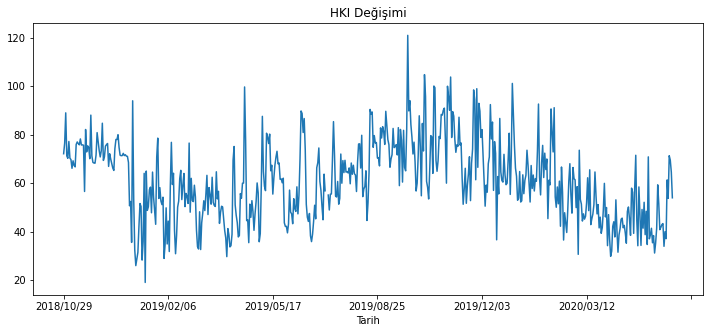

In [18]:
dategroup=data.groupby('Tarih').mean()
plt.figure(figsize=(12,5))
dategroup['HKI'].plot(x=data.Tarih)
plt.title('HKI Değişimi')

Text(0.5, 1.0, 'Aylara Göre HKI değişimleri')

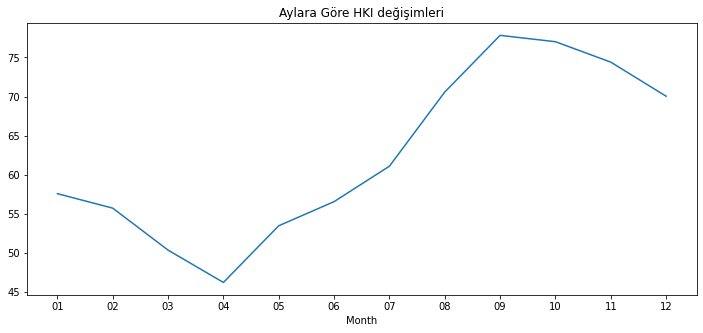

In [19]:
dategroup=data.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) 
dategroup['HKI'].plot(x=data.Month)
plt.title('Aylara Göre HKI değişimleri')

Text(0.5, 1.0, 'Günlere göre HKI değişimleri')

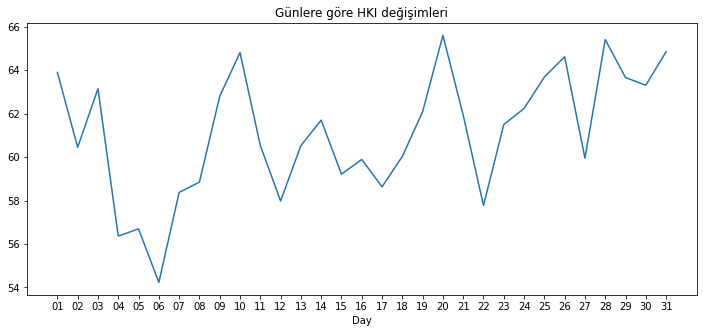

In [20]:


dategroup=data.groupby('Day').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,31)) 
dategroup['HKI'].plot(x=data.Day)
plt.title('Günlere göre HKI değişimleri')


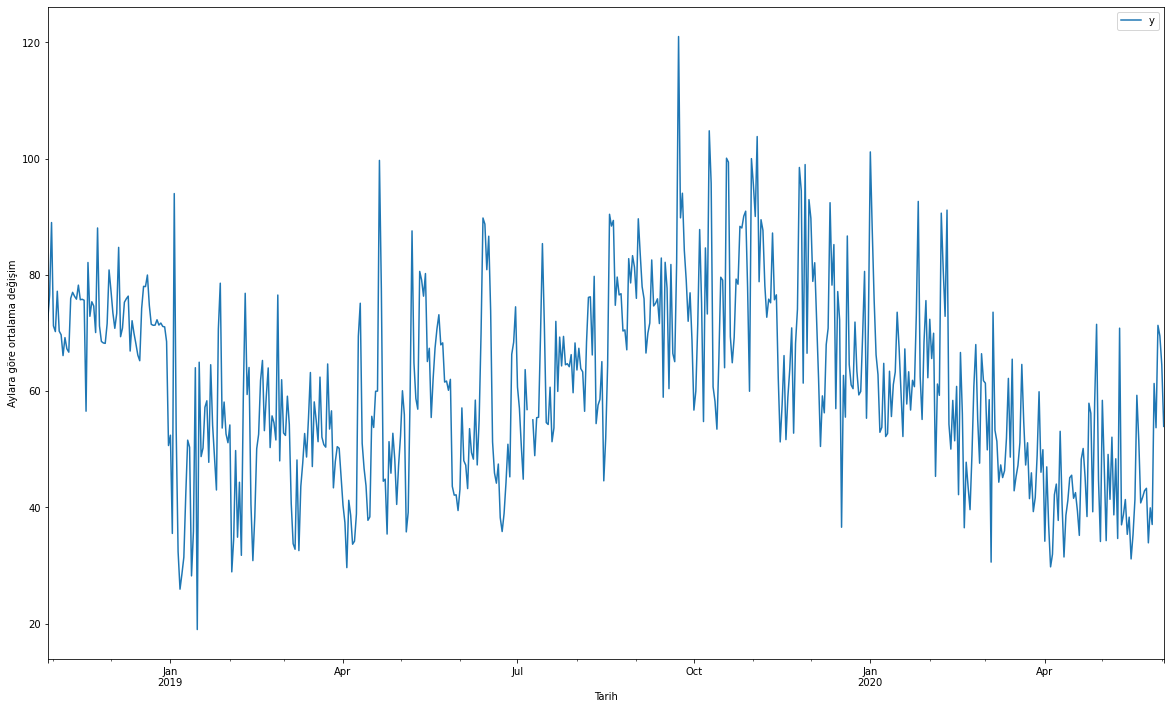

In [21]:
from fbprophet import Prophet

df = data.loc[:, ["Tarih","HKI"]]
df['Tarih'] = pd.DatetimeIndex(df['Tarih'])

df = df.rename(columns={'Tarih': 'ds',
                        'HKI': 'y'})

ax = df.set_index('ds').plot(figsize=(20, 12))
ax.set_ylabel('Aylara göre ortalama değişim')
ax.set_xlabel('Tarih')
plt.show()

In [22]:
my_model = Prophet()
my_model.fit(df)

future_dates = my_model.make_future_dataframe(periods=600)
forecast =my_model.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


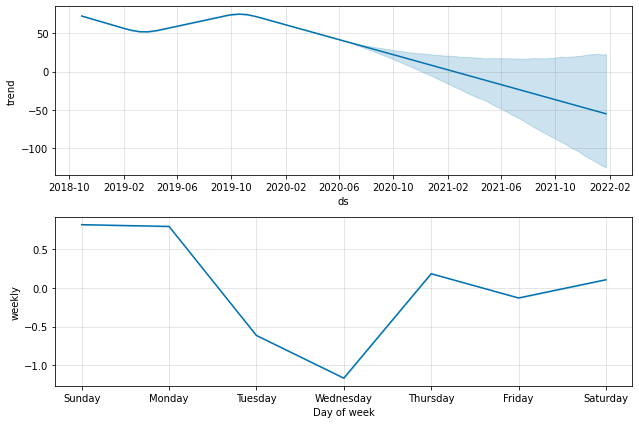

In [24]:
fig2 = my_model.plot_components(forecast)

In [0]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2020/06/11") & (forecastnew['ds'] <= "2020/06/25")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2018/10/29") & (forecastnew['ds'] <= "2020/06/11")
forecastnew = forecastnew.loc[mask]

Text(0.5, 0, 'Tarih')

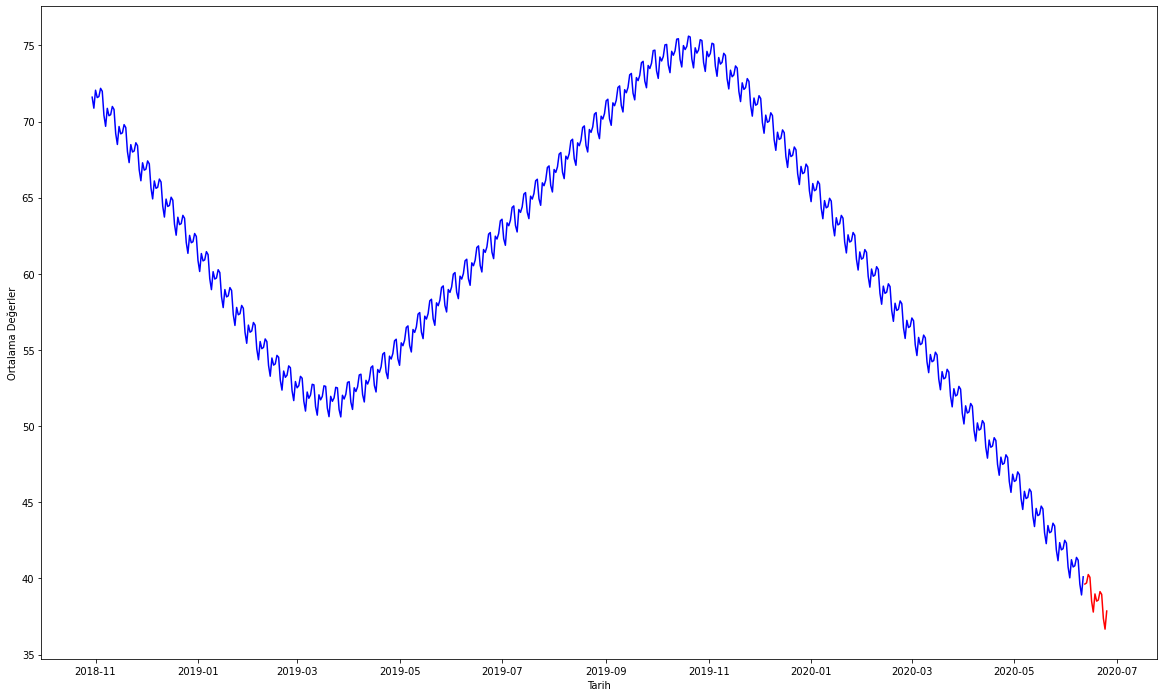

In [29]:
fig, ax1 = plt.subplots(figsize=(20,12))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Ortalama Değerler')
ax1.set_xlabel('Tarih')
